In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd

import keras
from keras.layers import Dense, Activation
from keras.models import Sequential
from keras.utils import np_utils

Using TensorFlow backend.


# Requirements for GPU usage

1. GPU (Nvidia)
2. Cuda (8.0 with ubuntu 16) [install from .run or .deb file]
3. NVCC
4. Theano

website: floydhub.com

In [2]:
ds = pd.read_csv('./train.csv')
data = ds.values

print data.shape
#print data[:, -1].mean()

(42000, 785)


In [3]:
data_length = 14000
split = int(data_length * 0.80)

X_train = data[:split, 1:]
X_val = data[split:data_length, 1:]

y_train = np_utils.to_categorical(data[:split, 0])
y_val = np_utils.to_categorical(data[split:data_length, 0])

print X_train.shape, X_val.shape
print y_train.shape, y_val.shape 

(11200, 784) (2800, 784)
(11200, 10) (2800, 10)


In [31]:
model = Sequential()

model.add(Dense(512, input_shape=(784,)))
model.add(Activation('tanh'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adagrad', metrics=['accuracy'])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_30 (Dense)                 (None, 512)           401920      dense_input_14[0][0]             
____________________________________________________________________________________________________
activation_30 (Activation)       (None, 512)           0           dense_30[0][0]                   
____________________________________________________________________________________________________
dense_31 (Dense)                 (None, 256)           131328      activation_30[0][0]              
____________________________________________________________________________________________________
activation_31 (Activation)       (None, 256)           0           dense_31[0][0]                   
___________________________________________________________________________________________

In [32]:
hist = model.fit(X_train, y_train,
                nb_epoch=50,
                shuffle=True,
                batch_size=100,
                validation_data=(X_val, y_val))

Train on 11200 samples, validate on 2800 samples
Epoch 1/50
11200/11200 [==============================] - 1s - loss: 0.9079 - acc: 0.7256 - val_loss: 0.3943 - val_acc: 0.8793
Epoch 2/50
11200/11200 [

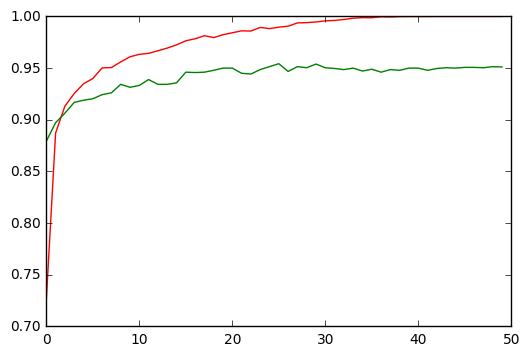

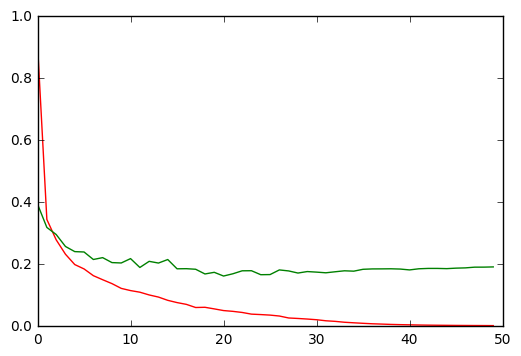

In [33]:
plt.figure(0)
plt.plot(hist.history['acc'], 'r')
plt.plot(hist.history['val_acc'], 'g')

plt.figure(1)
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'g')

plt.show()